<a href="https://colab.research.google.com/github/mhcrnl/100_python_programms/blob/master/28_SimpleStockCharts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Stock Charts

## Update: 26/04/2020

## Types of Stock Charts

In [3]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=900ea3993985252be9953ebea199f0d494e9003e019b6b30b3b0b2e7b2f8abfd
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [5]:
# input
symbol = 'AAPL'
start = '2018-12-01'
end = datetime.date.today() #'2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-03,184.460007,184.940002,181.210007,184.820007,181.653076,40802500
2018-12-04,180.949997,182.389999,176.270004,176.690002,173.662369,41344300
2018-12-06,171.759995,174.779999,170.419998,174.720001,171.726135,43098400
2018-12-07,173.490005,174.490005,168.300003,168.490005,165.602905,42281600
2018-12-10,165.000000,170.089996,163.330002,169.600006,166.693863,62026000


## Line Charts

No handles with labels found to put in legend.


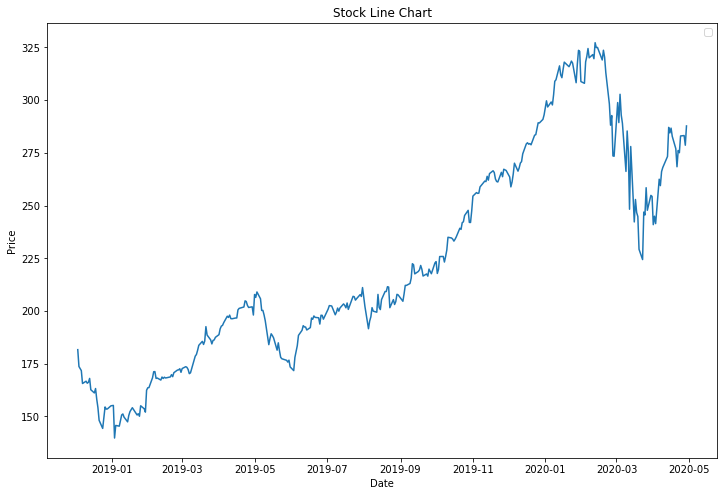

In [6]:
plt.figure(figsize=(12,8))
plt.plot(df['Adj Close'])
plt.title("Stock Line Chart")
plt.legend(loc='best')
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

## High Low Close Bar Stock Chart (HLC)

https://stackoverflow.com/questions/44810875/how-to-draw-a-classic-stock-chart-with-matplotlib

## Open High Low Close Bar Stock Chart (OHLC)

In [8]:
!pip install plotly==4.6.0
!pip install plotly --upgrade
!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Plot OHLC Bar Chart
trace = go.Ohlc(x=df['12-2018'].index,
                open=df['12-2018'].Open,
                high=df['12-2018'].High,
                low=df['12-2018'].Low,
                close=df['12-2018'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

     |████████████████████████████████| 7.2MB 2.7MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.6.0)
     |████████████████████████████████| 71kB 2.0MB/s 


In [0]:
py.iplot(data)

## Japanese Candlesticks Charts

Learn about candlestick:

https://www.quantinsti.com/blog/candlestick-patterns-meaning

https://www.investopedia.com/trading/candlestick-charting-what-is-it/

In [11]:
!pip install --upgrade mplfinance
import mplfinance as mpf
#from mpl_finance import candlestick_ohlc
from matplotlib import dates as mdates
import datetime as dt

Requirement already up-to-date: mplfinance in /usr/local/lib/python3.6/dist-packages (0.12.3a3)


In [12]:
# Converting date to pandas datetime format
dfc = df.copy()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

TypeError: ignored

In [0]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

In [0]:
# Plot Candlestick Chart
trace = go.Candlestick(x=df['12-2018'].index,
                open=df['12-2018'].Open,
                high=df['12-2018'].High,
                low=df['12-2018'].Low,
                close=df['12-2018'].Close)

data = [trace]
iplot(data, filename='simple_ohlc')

## Point and Figure Chart

https://github.com/pviglucci/pypf

In [13]:
from pypf.chart import PFChart
from pypf.instrument import YahooSecurity
i = YahooSecurity(symbol, force_download, force_cache, period, debug)
c = PFChart(i, box_size, duration, interval, method, reversal, style, trend_lines, debug)
c.create_chart()
print(c.chart)

ModuleNotFoundError: ignored

## Market Profile Stock Charts

https://github.com/bfolkens/py-market-profile

In [14]:
from market_profile import MarketProfile

ModuleNotFoundError: ignored

In [0]:
mp = MarketProfile(df, tick_size=1)
mp_slice = mp[df.index.max() - pd.Timedelta(6.5, 'd'):df.index.max()]

In [0]:
data = mp_slice.profile
data.plot(kind='bar')